Первые строки датасета:
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

Описательные статистики:
          user_id         age country  purchases      revenue
count   41.000000   39.000000      41  41.000000    41.000000
unique        NaN         NaN       5        NaN          NaN
top           NaN         

C:\Users\andre\AppData\Local\Temp\ipykernel_9248\2598512086.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age = df_clean.groupby('age_group').agg(


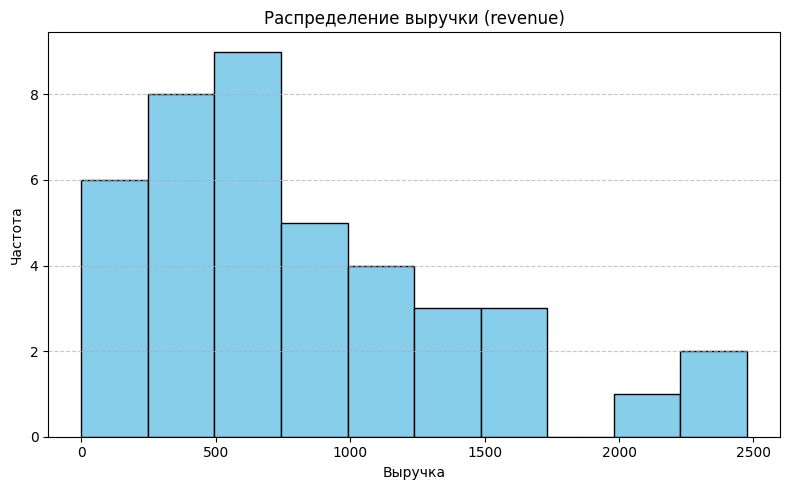

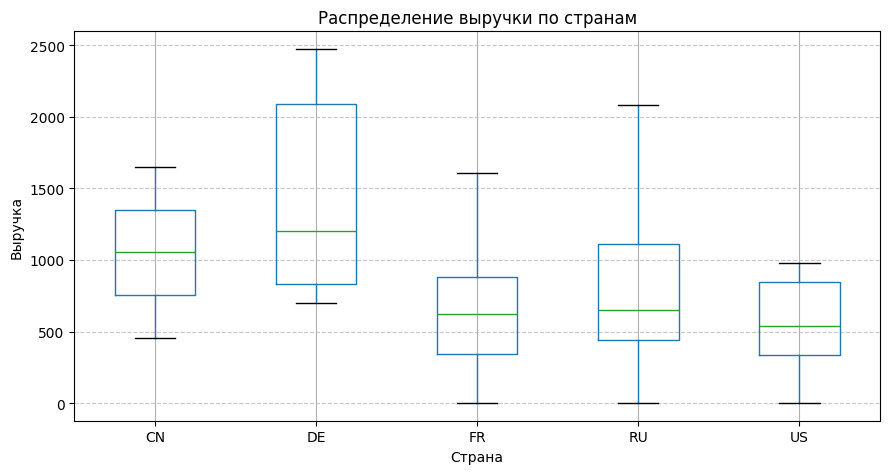

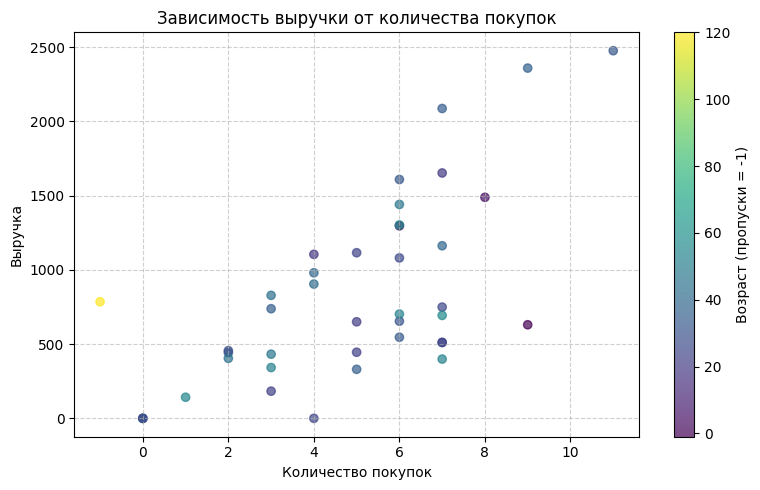

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 2.3.1. Загрузка данных и первичный осмотр
# Загрузка данных
df = pd.read_csv('S02-hw-dataset.csv')

print("Первые строки датасета:")
print(df.head())

print("\nИнформация о датасете:")
df.info()

print("\nОписательные статистики:")
print(df.describe(include='all'))

#### 2.3.2. Пропуски, дубликаты и базовый контроль качества
print("\nДоля пропусков в каждом столбце:")
print(df.isna().mean())

print("\nКоличество полностью дублирующих строк:")
print(df.duplicated().sum())

# Отрицательные значения в 'purchases'
suspicious_purchases = df[df['purchases'] < 0]
print("\nОтрицательные значения в purchases:")
print(suspicious_purchases)

# Нереалистичный возраст (>100)
suspicious_age = df[(df['age'] > 100) | (df['age'] < 0)]
print("\nНереалистичный возраст (>100 или <0):")
print(suspicious_age)

# purchases = 0, но revenue > 0
revenue_positive_no_purchases = df[(df['purchases'] == 0) & (df['revenue'] > 0)]
print("\nПокупки = 0, но выручка > 0:")
print(revenue_positive_no_purchases)

# В датасете обнаружены следующие проблемы качества данных:
# 1) Пропущены значение в столбце age для двух записей (user_id = 5 и 13)
# 2) Возраст нереалистичный age = 120 в user_id = 6
# 3) Отрицательное количество покупок (purchases = -1) у user_id=6.
# 4) Встречаются случаи, когда purchases > 0, но revenue = 0 (у user_id = 11)

#### 2.3.3. Базовый EDA: группировки, агрегаты и частоты
print("\nЧастоты по странам:")
print(df['country'].value_counts())

grouped = df.groupby('country').agg(
    total_revenue=('revenue', 'sum'),
    avg_revenue=('revenue', 'mean'),
    avg_purchases=('purchases', 'mean'),
    user_count=('user_id', 'count')
).round(2)
print("\nАгрегированные метрики по странам:")
print(grouped)

# Создадим возрастные группы, исключая некорректные значения (>100 или NaN)
df_clean = df[(df['age'] >= 0) & (df['age'] <= 100)].copy()
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels)

grouped_age = df_clean.groupby('age_group').agg(
    avg_revenue=('revenue', 'mean'),
    avg_purchases=('purchases', 'mean')
).round(2)
print("\nАгрегированные метрики по возрастным группам:")
print(grouped_age)

# В датасете доминируют пользователи из России (11 записей) и Франции (10 записей), затем идут из США (7), Германии (6) и Китая (2). 
# Несмотря на меньшее количество пользователей, Германия демонстрирует наибольшую среднюю выручку на пользователя (около 1205,5 / суммарно 2411). 
# Для сравнения, во Франции этот показатель составляет примерно 758, в России около 685, в США  около 460. 
# Среднее количество покупок в Германии (7.0). Во Франции и России оно находится на уровне 5.5–6.0. 
# При анализе по возрастным группам # наибольшую среднюю выручку генерирует группа 31–45 лет, 
# что свидетельствовует о более высокой платёжеспособности пользователей среднего возраста по сравнению с молодыми (19–30 лет). 
# В США, несмотря на сопоставимое количество покупок с другими странами, средняя выручка значительно ниже.

### 2.4. Визуализация данных в Matplotlib
plt.figure(figsize=(8, 5))
plt.hist(df['revenue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Распределение выручки (revenue)')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('figures/histogram.png')
plt.show()

plt.figure(figsize=(9, 5))
df.boxplot(column='revenue', by='country', ax=plt.gca())
plt.title('Распределение выручки по странам')
plt.suptitle('')  # убираем автоматический заголовок от pandas
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('figures/boxplot.png')
plt.show()

plt.figure(figsize=(8, 5))
scatter = plt.scatter(df['purchases'], df['revenue'], c=df['age'].fillna(-1), cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Возраст (пропуски = -1)')
plt.title('Зависимость выручки от количества покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('figures/scatter.png')
plt.show()